In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from  sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import missingno as mno
import warnings
warnings.filterwarnings("ignore")

In [184]:
df = pd.read_csv('energydata_complete.csv')
df.describe()
df.info()
df.head(25)
df.tail(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19710,2016-05-27 14:00:00,190,10,25.500000,47.060000,26.540000,41.000000,28.200000,41.530000,24.600000,...,23.100000,46.530000,22.000000,755.80,59.000000,2.000000,22.000000,13.600000,41.515044,41.515044
19711,2016-05-27 14:10:00,160,0,25.600000,46.990000,26.512500,41.203750,28.200000,41.590000,24.633333,...,23.100000,46.530000,21.966667,755.80,59.000000,2.000000,21.833333,13.550000,19.540642,19.540642
19712,2016-05-27 14:20:00,80,0,25.600000,46.730000,26.437143,41.384286,28.426667,41.430000,24.700000,...,23.100000,46.590000,21.933333,755.80,59.000000,2.000000,21.666667,13.500000,16.977597,16.977597
19713,2016-05-27 14:30:00,60,0,25.566667,46.633333,26.370000,41.378000,28.566667,41.156667,24.700000,...,23.100000,46.626667,21.900000,755.80,59.000000,2.000000,21.500000,13.450000,8.991420,8.991420
19714,2016-05-27 14:40:00,60,0,25.500000,46.360000,26.318571,41.264286,28.566667,40.663333,24.700000,...,23.100000,46.700000,21.866667,755.80,59.000000,2.000000,21.333333,13.400000,40.409885,40.409885
19715,2016-05-27 14:50:00,60,0,25.500000,46.060000,26.350000,41.000000,28.426667,40.590000,24.666667,...,23.100000,46.590000,21.833333,755.80,59.000000,2.000000,21.166667,13.350000,37.889086,37.889086
19716,2016-05-27 15:00:00,60,0,25.500000,45.933333,26.277143,41.000000,28.356667,40.560000,24.666667,...,23.100000,46.590000,21.800000,755.80,59.000000,2.000000,21.000000,13.300000,17.123315,17.123315
19717,2016-05-27 15:10:00,70,0,25.500000,45.760000,26.200000,41.000000,28.290000,40.433333,24.700000,...,23.133333,46.590000,21.966667,755.75,58.333333,2.000000,21.333333,13.283333,24.058432,24.058432
19718,2016-05-27 15:20:00,80,0,25.500000,45.626667,26.171429,41.000000,28.260000,40.260000,24.700000,...,23.133333,46.590000,22.133333,755.70,57.666667,2.000000,21.666667,13.266667,9.538671,9.538671
19719,2016-05-27 15:30:00,80,0,25.500000,45.590000,26.100000,41.000000,28.200000,40.126667,24.700000,...,23.166667,46.590000,22.300000,755.65,57.000000,2.000000,22.000000,13.250000,30.020685,30.020685


On initial exploring of the data we can see that none of the rows have NaN values or null values

In [186]:
df['date'] = pd.to_datetime(df['date'])

Missing data visualisation

<AxesSubplot:>

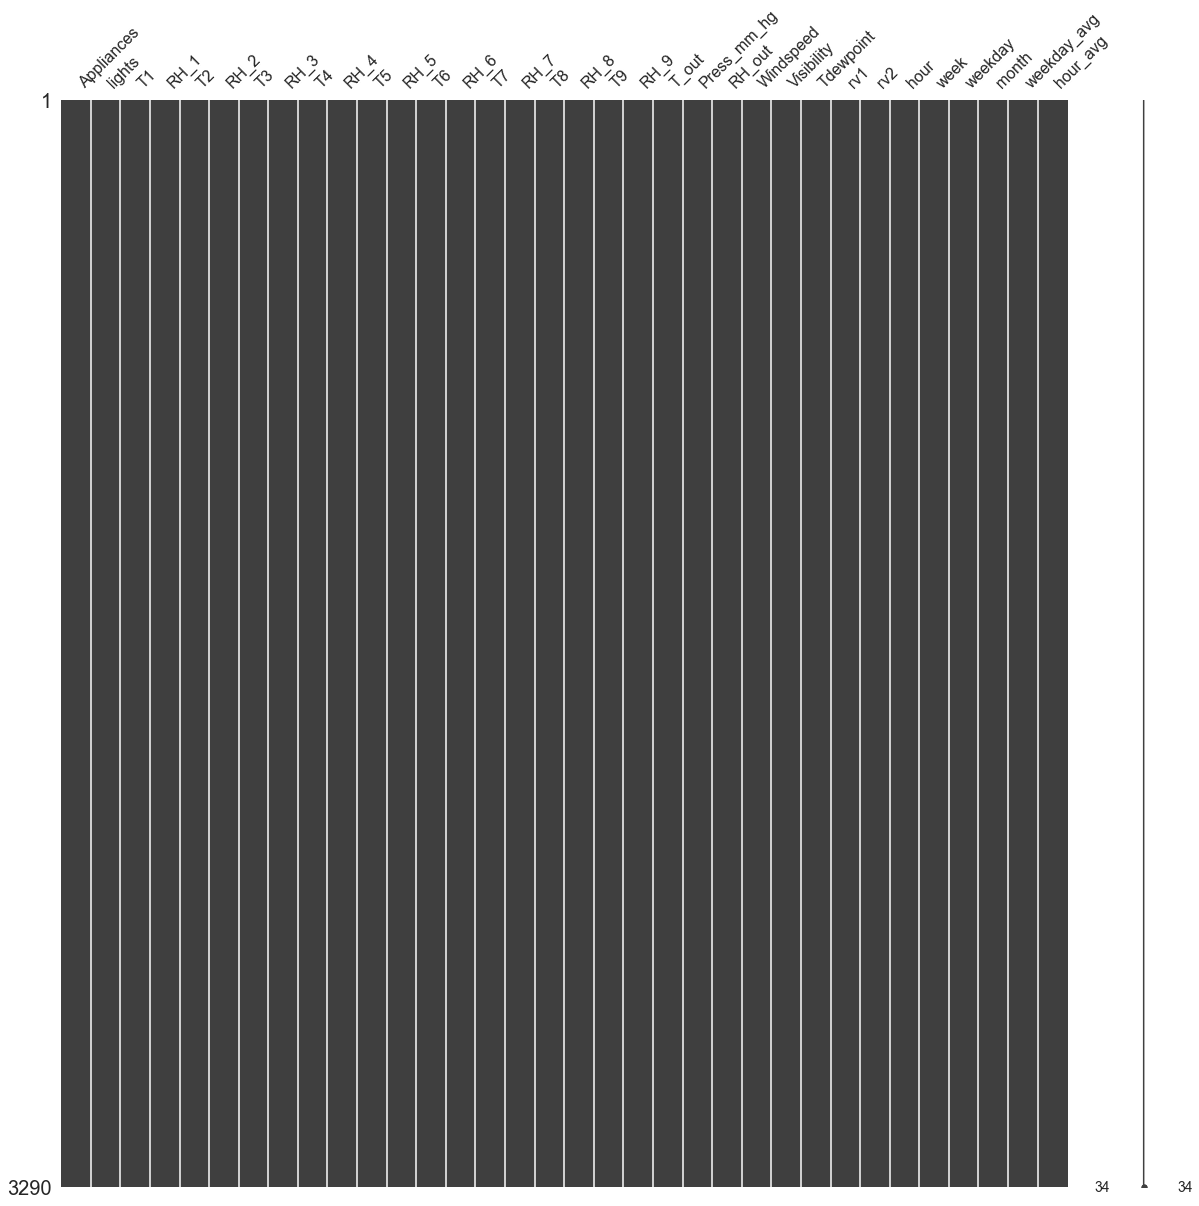

In [200]:
mno.matrix(df, figsize = (20, 20))


Exploratory Data Analysis of the dataset

In [ ]:
df.corr()

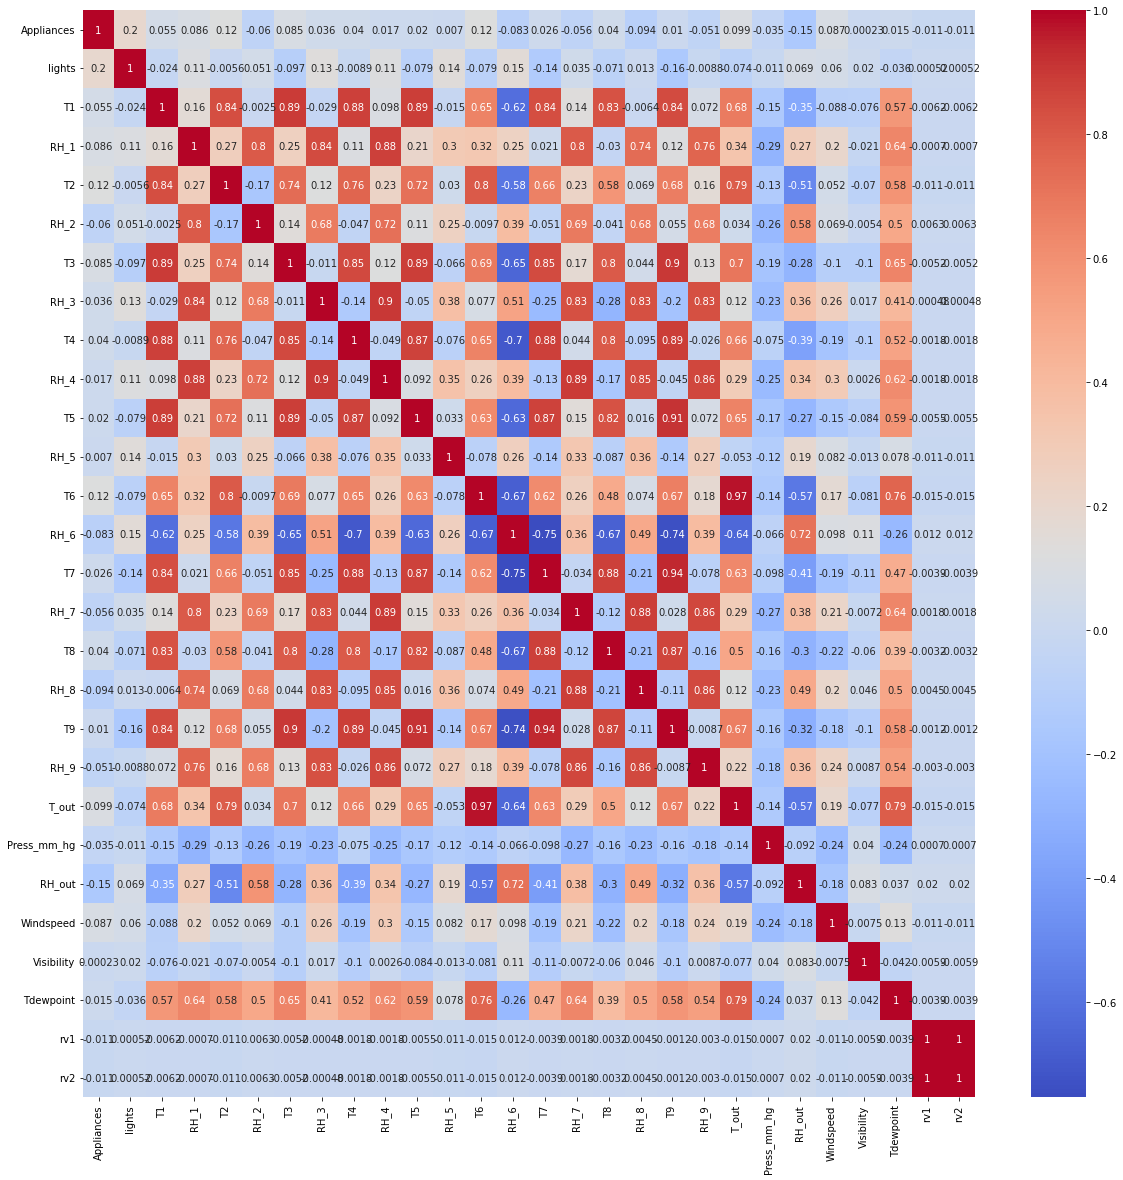

In [160]:
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,20))
#making of heatmap
df_heatmap = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm")

array([[<AxesSubplot:title={'center':'lights'}>]], dtype=object)

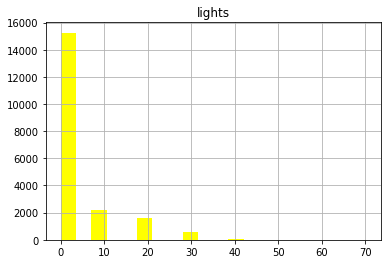

In [161]:
# for each feature variable we do this to generate a histogram to get an idea about the distribution of the variable
df.hist(column='lights', bins=20, color = 'yellow')

Looking for outliers

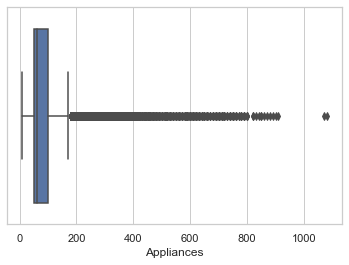

In [170]:
sortedValues = df.sort_values('Appliances', ascending=False)
sortedValues.head(30)
highest = len(sortedValues.head(len(sortedValues)//1000))

# boxplot appliances
sns.set(style="whitegrid")
ax = sns.boxplot(sortedValues.Appliances)

In [171]:
df = df.drop(df[(df.Appliances>790)|(df.Appliances<0)].index)


Random variables rv1 and rv2 have more or less same distribution for all variables so we can drop those. We drop the lights column also as they are the readings of a submeter and we are not focusing on appliance specific reading


In [187]:

df['hour'] = df['date'].dt.hour
df['week'] = df['date'].dt.week
df['weekday'] = df['date'].dt.weekday
df['month'] = df['date'].dt.month

def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

df['weekday_avg'] = list(map(
    code_mean(df[:], 'weekday', "Appliances").get, df.weekday))
df['hour_avg'] = list(map(
    code_mean(df[:], 'hour', "Appliances").get, df.hour))

df = df.resample('1H', on='date').mean()
# df_30min = df.resample('30min', on='date').mean()

In [188]:
def daily(x,df=df):
    return df.groupby('weekday')[x].mean()
def hourly(x,df=df):
    return df.groupby('hour')[x].mean()

def monthly_daily(x,df=df):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)

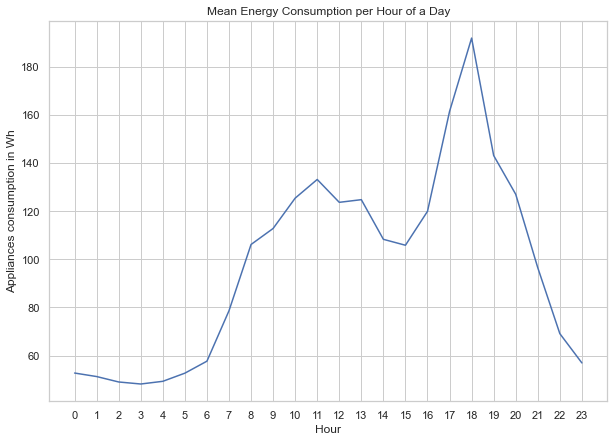

In [190]:
#plotting the hourly consumption

hourly('Appliances').plot(figsize=(10,7))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

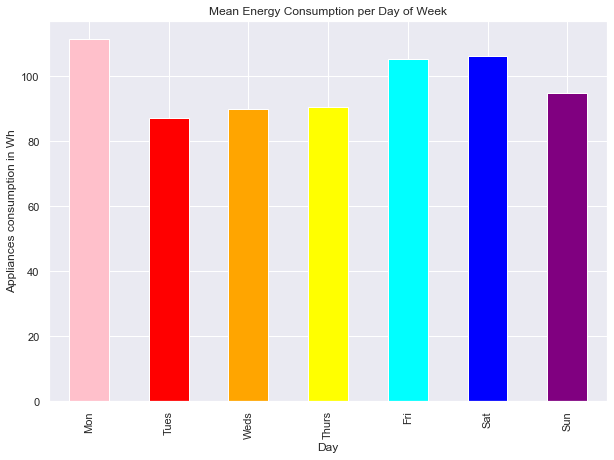

In [195]:
#Weekly Consumption

daily('Appliances').plot(kind = 'bar', color=['pink', 'red', 'orange', 'yellow', 'cyan', 'blue', 'purple'], figsize=(10,7))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

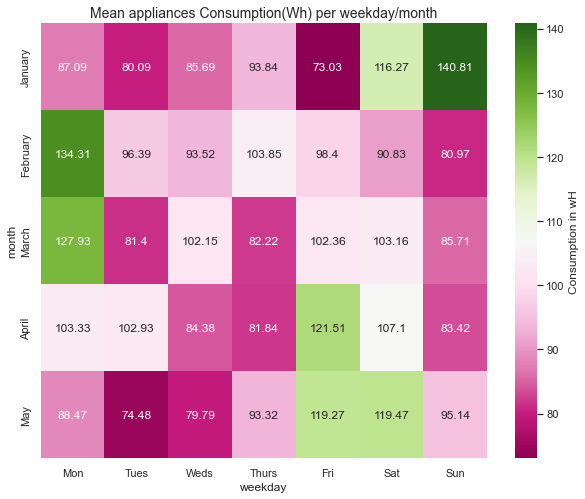

In [194]:
#MOntly Consumption
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('Appliances').T,cmap="PiYG",
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(),
               yticklabels="January February March April May".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Consumption in wH'}).set_title("Mean appliances Consumption(Wh) per weekday/month").set_fontsize('14')

plt.show()

Applying the Regression models

In [196]:
# Divide the columns based on type 
random = ["rv1", "rv2"]

target = ["Appliances"]

temperature = ["T1","T2","T3","T4","T5","T7","T8"]

humidity = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

weather = ["Windspeed","Visibility","T_out", "Tdewpoint","RH_out","Press_mm_hg"] 

In [197]:
# Seperate dependent and independent variables 
feature_vars = df[temperature+ humidity + weather] 
target_vars = df[target]

In [ ]:
target_vars

,Appliances
date,
2016-01-11 17:00:00,55.000000
2016-01-11 18:00:00,176.666667
2016-01-11 19:00:00,173.333333
2016-01-11 20:00:00,125.000000
2016-01-11 21:00:00,103.333333
...,...
2016-05-27 14:00:00,101.666667
2016-05-27 15:00:00,76.666667
2016-05-27 16:00:00,135.000000


In [ ]:
x = feature_vars
y = target_vars

test_size=.2
test_index = int(len(df.dropna())*(1-test_size))

scaler= StandardScaler()
x=scaler.fit_transform(x)


In [ ]:


x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=0)



Data Scaling: Using Standard Scaler for scaling as some of the columns contains outliers and min_max are very sensitive to outiers

In [ ]:
compiled= pd.DataFrame(columns= ['Regressor', 'Avg_Train_Score', 'Avg_Test_Score', 'RMSE_Best_Param', 'Best_Hyperparameters'])
#output table 

Linear Regression Model

In [ ]:

lreg= LinearRegression()
lreg.fit(x_train, y_train)
print(f'Train score for Linear regression model without using Kfold validation is: {lreg.score(x_train, y_train)}')

train_scores= cross_val_score(lreg,x_train,y_train, cv=10)
print(f'Train score for Linear regression model using 10Fold cross validation is:  {train_scores.mean()}')
test_scores= cross_val_score(lreg,x_test,y_test, cv=10)
print(f'Test score for Linear regression model using 10Fold cross validation is:  {test_scores.mean()}')

Train score for Linear regression model without using Kfold validation is: 0.24885041506812777
Train score for Linear regression model using 10Fold cross validation is:  0.2293318416844819
Test score for Linear regression model using 10Fold cross validation is:  0.14309940773832028


In [ ]:
mse= cross_val_score(lreg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
print(f'RMSE for Linear regression model using 10Fold cross validation is: {mse.mean()}')

RMSE for Linear regression model using 10Fold cross validation is: -4881.034650269425


In [ ]:
compiled=compiled.append({'Regressor': 'LinearRegression', 'Avg_Train_Score': train_scores.mean(), 
                          'Avg_Test_Score': test_scores.mean(), 'RMSE_Best_Param': mse.mean(), 
                          'Best_Hyperparameters': "N/A"}, ignore_index=True)

C:\Users\Kriti Kapoor\AppData\Local\Temp\ipykernel_28188\2710427540.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiled=compiled.append({'Regressor': 'LinearRegression', 'Avg_Train_Score': train_scores.mean(),


Improved Linear Regression
1. Ridge

In [ ]:
ridge= Ridge()
param= {'alpha':[ 0.01, 0.1, 1, 5, 10,20,30,50]}
ridge_regressor= GridSearchCV(ridge, param, cv=10, return_train_score= True)
ridge_regressor.fit(x_train, y_train)
ridge_regressor.score(x_test, y_test)

0.25361180158902463

In [ ]:
ridge_train_score_list= ridge_regressor.cv_results_["mean_train_score"]
print(f'Train score across different alpha is: {ridge_train_score_list}')

ridge_test_score_list= ridge_regressor.cv_results_["mean_test_score"]
print(f'\nTest score across different alpha is: {ridge_test_score_list}')

Train score across different alpha is: [0.24971967 0.24971933 0.24968667 0.24905207 0.24759768 0.24390701
 0.24007442 0.23300455]

Test score across different alpha is: [0.22933345 0.22934756 0.22945229 0.22932015 0.22835459 0.22542328
 0.22219637 0.21608901]


Best parameter for ridge regression is: {'alpha': 1}
Average training score for ridge regression model using 10Fold CV is: 0.24534517327491417
Average testing score for ridge regression model using 10Fold CV is: 0.22618958634911668


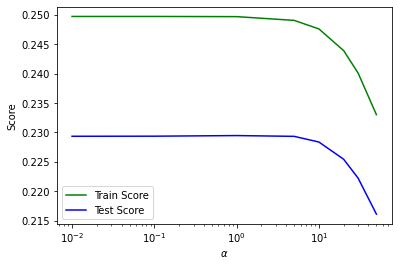

In [ ]:
import matplotlib.pyplot as plt
#visualize the result:plots
x_range= [0.01, 0.1, 1, 5, 10, 20, 30, 50]
plt.plot(x_range, ridge_train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, ridge_test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')

print(f'Best parameter for ridge regression is: {ridge_regressor.best_params_}')
print(f'Average training score for ridge regression model using 10Fold CV is: {((ridge_regressor.cv_results_["mean_train_score"]).sum())/len(x_range)}')
print(f'Average testing score for ridge regression model using 10Fold CV is: {((ridge_regressor.cv_results_["mean_test_score"]).sum())/len(x_range)}')
      

In [ ]:
#Implementing the final model with the best param with Root mean squared error(RMSE) as the scoring metrics
ridge_final= Ridge(alpha=20)
ridge_final.fit(x_train, y_train)
ridge_final_train_scores= cross_val_score(ridge_final,x_train, y_train, cv=10, scoring= 'neg_mean_squared_error')
ridge_final_test_scores= cross_val_score(ridge_final,x_test, y_test, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Ridge regression model using 10 Fold CV is: {ridge_final_train_scores.mean()}')
print(f'Test  RMSE for best Ridge regression model using 10 Fold CV is: {ridge_final_test_scores.mean()}')

Train RMSE for best Ridge regression model using 10 Fold CV is: -4909.073442431137
Test  RMSE for best Ridge regression model using 10 Fold CV is: -4972.295940029439


In [ ]:
compiled=compiled.append({'Regressor': 'Ridge_Regression', 
                          'Avg_Train_Score': ((ridge_regressor.cv_results_["mean_train_score"]).sum())/len(x_range), 
                          'Avg_Test_Score': ((ridge_regressor.cv_results_["mean_test_score"]).sum())/len(x_range), 
                          'RMSE_Best_Param': ridge_final_test_scores.mean(),
                          'Best_Hyperparameters': ridge_regressor.best_params_}, ignore_index=True)

C:\Users\Kriti Kapoor\AppData\Local\Temp\ipykernel_28188\452702576.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiled=compiled.append({'Regressor': 'Ridge_Regression',


2. Lasso

In [ ]:
compiled

,Regressor,Avg_Train_Score,Avg_Test_Score,RMSE_Best_Param,Best_Hyperparameters
0,LinearRegression,0.229332,0.143099,-4881.03465,N/A
1,Ridge_Regression,0.245345,0.226190,-4972.29594,{'alpha': 1}


In [ ]:
#Lasso regression
lasso= Lasso()
param= {'alpha':[0.0001, 0.001, 0.01, 0.1, 1,5]}
lasso_regressor= GridSearchCV(lasso, param, cv=10, return_train_score= True)
lasso_regressor.fit(x_train, y_train)
lasso_regressor.score(x_test, y_test)

c:\Users\Kriti Kapoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.951e+05, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Kriti Kapoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.668e+05, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Kriti Kapoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

0.25487066026164584

In [ ]:
lasso_test_score_list= lasso_regressor.cv_results_["mean_test_score"]
print(f'Train score across different alpha is: {lasso_test_score_list}')

lasso_train_score_list= lasso_regressor.cv_results_["mean_train_score"]
print(f'\nTest score across different alpha is: {lasso_train_score_list}')

Train score across different alpha is: [0.22933433 0.22935362 0.22950879 0.22960042 0.20457951 0.08905794]

Test score across different alpha is: [0.24971967 0.24971955 0.24971    0.24915346 0.22092865 0.09459115]


Best parameter for Lasso regression is: {'alpha': 0.1}
Average training score for Lasso regression model using 10Fold CV is: 0.21897041460614175
Average testing score for Lasso regression model using 10Fold CV is: 0.2019057663131861


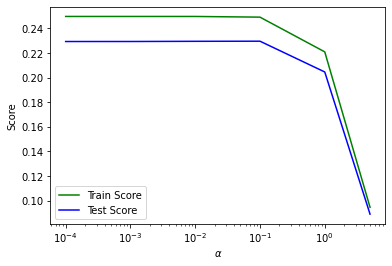

In [ ]:
#visualize the result:plots
x_range= [0.0001, 0.001, 0.01, 0.1, 1,5]
plt.plot(x_range, lasso_train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, lasso_test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')


print(f'Best parameter for Lasso regression is: {lasso_regressor.best_params_}')
print(f'Average training score for Lasso regression model using 10Fold CV is: {((lasso_regressor.cv_results_["mean_train_score"]).sum())/len(x_range)}')
print(f'Average testing score for Lasso regression model using 10Fold CV is: {((lasso_regressor.cv_results_["mean_test_score"]).sum())/len(x_range)}')
      

In [ ]:


#Implementing the final model with the best param with Root mean squared error(RMSE) as the scoring metrics
lasso_final= Lasso(alpha=0.1)
lasso_final.fit(x_train, y_train)
lasso_final_train_scores= cross_val_score(lasso_final,x_train, y_train, cv=10, scoring= 'neg_mean_squared_error')
lasso_final_test_scores= cross_val_score(lasso_final,x_test, y_test, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Lasso regression model using 10 Fold CV is: {lasso_final_train_scores.mean()}')
print(f'Test  RMSE for best Lasso regression model using 10 Fold CV is: {lasso_final_test_scores.mean()}')



Train RMSE for best Lasso regression model using 10 Fold CV is: -4880.680128983007
Test  RMSE for best Lasso regression model using 10 Fold CV is: -4915.6541824773485


In [ ]:
compiled=compiled.append({'Regressor': 'Lasso_Regression',
                          'Avg_Train_Score': ((lasso_regressor.cv_results_["mean_train_score"]).sum())/len(x_range), 
                          'Avg_Test_Score': ((lasso_regressor.cv_results_["mean_test_score"]).sum())/len(x_range),
                          'RMSE_Best_Param': lasso_final_test_scores.mean(), 'Best_Hyperparameters': lasso_regressor.best_params_}, ignore_index=True)



C:\Users\Kriti Kapoor\AppData\Local\Temp\ipykernel_28188\352757951.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiled=compiled.append({'Regressor': 'Lasso_Regression',


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy)) 

Simple Linear SVM

In [ ]:


param_grid = {'C': [ 0.1, 1, 10, 20, 50, 100, 200] }
svm_model = LinearSVR()
linearSVM_regressor= GridSearchCV(svm_model, param_grid, cv=5, return_train_score= True)



In [ ]:


linearSVM_regressor.fit(x_train, y_train)
linearSVM_regressor.score(x_train, y_train)



c:\Users\Kriti Kapoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kriti Kapoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kriti Kapoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kriti Kapoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\uti

0.09260741755676227

In [ ]:
linearSVM_regressor_train_score_list= linearSVM_regressor.cv_results_["mean_train_score"]
print(f'Train score across different params is: {linearSVM_regressor_train_score_list}')

linearSVM_regressor_test_score_list= linearSVM_regressor.cv_results_["mean_test_score"]
print(f'Test score across different params is: {linearSVM_regressor_test_score_list}')

Train score across different params is: [-0.16530787  0.03613063  0.09267038  0.09495493  0.09605131  0.09813889
  0.09458961]
Test score across different params is: [-0.16778428  0.03154873  0.08771447  0.0887537   0.08994633  0.09317207
  0.08940795]


Best parameter for Linear SVM regression is: {'C': 100}
Average training score for Linear SVM regression model using 10Fold CV is: 0.04960398374820744
Average testing score for Linear SVM regression model using 10Fold CV is: 0.04467985416174845


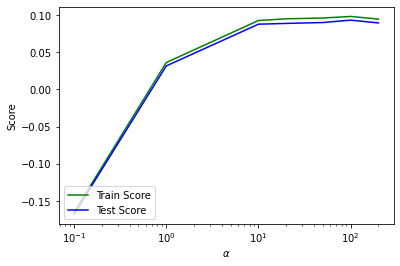

In [ ]:
x_range=  [ 0.1, 1, 10, 20, 50, 100, 200]
plt.plot(x_range, linearSVM_regressor_train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, linearSVM_regressor_test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')

print(f'Best parameter for Linear SVM regression is: {linearSVM_regressor.best_params_}')
print(f'Average training score for Linear SVM regression model using 10Fold CV is: {((linearSVM_regressor.cv_results_["mean_train_score"]).sum())/len(x_range)}')
print(f'Average testing score for Linear SVM regression model using 10Fold CV is: {((linearSVM_regressor.cv_results_["mean_test_score"]).sum())/len(x_range)}')
      

In [ ]:
#Implementing Linear SVM regression model using the best found parameters
linearSVM_final= LinearSVR(C= 50, max_iter=10000)


In [ ]:
linearSVM_final.fit(x_train, y_train.values.ravel())


LinearSVR(C=50, max_iter=10000)

In [ ]:
linearSVM_final_final_train_score= cross_val_score(linearSVM_final,x_train, y_train.values.ravel(), cv=10, scoring= 'neg_mean_squared_error')
linearSVM_final_final_test_score= cross_val_score(linearSVM_final,x_test, y_test.values.ravel(), cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Simple linearSVM regression model using 10 Fold CV is: {linearSVM_final_final_train_score.mean()}')
print(f'Test RMSE for best Simple linearSVM regression model using 10 Fold CV is: {linearSVM_final_final_test_score.mean()}')

Train RMSE for best Simple linearSVM regression model using 10 Fold CV is: -5780.490008812383
Test RMSE for best Simple linearSVM regression model using 10 Fold CV is: -5868.631007499896


In [ ]:


compiled=compiled.append({'Regressor': 'linear_SVMRegression',
                          'Avg_Train_Score': ((linearSVM_regressor.cv_results_["mean_train_score"]).sum())/len(linearSVM_regressor_train_score_list), 
                          'Avg_Test_Score': ((linearSVM_regressor.cv_results_["mean_test_score"]).sum())/len(linearSVM_regressor_test_score_list),
                          'RMSE_Best_Param': linearSVM_final_final_train_score.mean(),
                          'Best_Hyperparameters': linearSVM_regressor.best_params_}, ignore_index=True)



C:\Users\Kriti Kapoor\AppData\Local\Temp\ipykernel_28188\1958427587.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiled=compiled.append({'Regressor': 'linear_SVMRegression',


1. Kernalized SVM Regression

In [ ]:


#Creating hyperparameters for Grid Search
from sklearn.svm import SVR
parameters = [{'C':[ 0.1,1], 'kernel':['rbf','linear','poly'], 'gamma':[0.01,0.1]}]

SVM_regressor = GridSearchCV(estimator = SVR(), scoring= 'neg_mean_squared_error', param_grid = parameters, cv=5, n_jobs = -1)

SVM_regressor.fit(x_train,y_train.values.ravel())

print("Grid search best score:", SVM_regressor.best_score_)
print("Grid search best parameters:", SVM_regressor.best_params_)





Grid search best score: -6031.904458111718
Grid search best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}


In [ ]:
SVM_regressor.score(x_test, y_test.values.ravel())


SVM_regressor_test_score_list= SVM_regressor.cv_results_["mean_test_score"]
print(f'Test score across different params is: {SVM_regressor_test_score_list}') 

#we do not have mean train score



Test score across different params is: [-7479.9704404  -6524.95438636 -7536.4662204  -7441.6228443
 -6524.95438636 -6995.77576929 -7138.22149893 -6031.90445811
 -7510.2838689  -6961.81647975 -6031.90445811 -6197.96656752]


In [ ]:
print(f'Best parameter for SVM regression is: {SVM_regressor.best_params_}')
#print(f'Average training score for SVM regression model using 10Fold CV is: {(SVM_regressor_train_score_list.sum())/len(SVM_regressor_train_score_list)}')
print(f'Average testing score for SVM regression model using 10Fold CV is: {(SVM_regressor_test_score_list.sum())/len(SVM_regressor_test_score_list)}')

Best parameter for SVM regression is: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Average testing score for SVM regression model using 10Fold CV is: -6864.65344820156


In [ ]:


#Implementing SVM Regressor model with the best estimator found from above analysis
svm_final= SVR(C=1 , gamma= 0.1 , kernel='poly')
svm_final.fit(x_train, y_train.values.ravel())
svm_final_train_scores=cross_val_score(svm_final,x_train, y_train.values.ravel(), cv=10, scoring= 'neg_mean_squared_error')
svm_final_test_scores=cross_val_score(svm_final,x_test, y_test.values.ravel(), cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best SVM regression model using 10 Fold CV is: {lasso_final_train_scores.mean()}')
print(f'Test  RMSE for best SVM regression model using 10 Fold CV is: {lasso_final_test_scores.mean()}')



Train RMSE for best SVM regression model using 10 Fold CV is: -4880.680128983007
Test  RMSE for best SVM regression model using 10 Fold CV is: -4915.6541824773485


In [ ]:


compiled=compiled.append({'Regressor': 'Kernel_SVMRegression',
                          'Avg_Train_Score': '-', 
                          'Avg_Test_Score':  (SVM_regressor_test_score_list.sum())/len(SVM_regressor_test_score_list),
                          'RMSE_Best_Param': lasso_final_test_scores.mean(),
                          'Best_Hyperparameters': SVM_regressor.best_params_}, ignore_index=True)



C:\Users\Kriti Kapoor\AppData\Local\Temp\ipykernel_28188\792598915.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiled=compiled.append({'Regressor': 'Kernel_SVMRegression',


Decision Tree Regressor 

In [ ]:


tree = DecisionTreeRegressor()
param_grid = [{'splitter': ['best', 'random'], 'max_depth': np.arange(5,15), 'max_features':[4,5,8,10]}]

tree_regressor= GridSearchCV(tree, param_grid, cv=5, return_train_score= True)              



In [ ]:


tree_regressor.fit(x_train, y_train)
tree_regressor.score(x_test, y_test)



0.027987127048271554

In [ ]:
tree_test_score_list= tree_regressor.cv_results_["mean_test_score"]
print(f'Test score across different alpha is: {tree_test_score_list}')
tree_train_score_list= tree_regressor.cv_results_["mean_train_score"]
print(f'\nTrain score across different alpha is: {tree_train_score_list}')

Test score across different alpha is: [ 0.04189425  0.02887975  0.00441756 -0.00315051  0.05128599  0.01495891
  0.02113372  0.01679743 -0.06026353  0.02599887 -0.00806255  0.03240099
 -0.00489883  0.03139286  0.02581924  0.02256476 -0.04529596 -0.0283185
  0.00818293 -0.00900918  0.02020842 -0.06155029 -0.03062216 -0.00582037
 -0.04624003  0.01571435 -0.09668251 -0.02166672 -0.01242389 -0.02032399
 -0.03624384 -0.01413604 -0.10955847 -0.0103994  -0.08994272 -0.07492152
 -0.07159846 -0.10958481 -0.08953002 -0.08067525 -0.07501086 -0.06512612
 -0.03229922 -0.06103138 -0.05553189 -0.14059415 -0.10034748 -0.09553784
 -0.12462525 -0.09585857 -0.14844163 -0.09700823 -0.1123436  -0.14820088
 -0.18210447 -0.08933468 -0.28111888 -0.18643835 -0.17057062 -0.11683031
 -0.24428401 -0.12733778 -0.27546141 -0.30224044 -0.18102528 -0.20577375
 -0.22237228 -0.31518576 -0.2494249  -0.3149818  -0.23668437 -0.16719504
 -0.30107082 -0.26616825 -0.1756753  -0.27491847 -0.1933933  -0.24833711
 -0.25389058 -

In [ ]:
print(f'Best parameter for Decision tree regression is: {tree_regressor.best_params_}')
print(f'Average training score for KNN regression model using 10Fold CV is: {(tree_train_score_list.sum())/len(tree_train_score_list)}')
print(f'Average testing score for KNN regression model using 10Fold CV is: {(tree_test_score_list.sum())/len(tree_test_score_list)}')

Best parameter for Decision tree regression is: {'max_depth': 5, 'max_features': 8, 'splitter': 'best'}
Average training score for KNN regression model using 10Fold CV is: 0.4863811615630689
Average testing score for KNN regression model using 10Fold CV is: -0.10048058064257304


In [ ]:
#Implementing Decision Tree Regressor model with the best estimator found from above analysis
tree_final= DecisionTreeRegressor(max_depth=8, max_features=5, splitter= 'random')
tree_final.fit(x_train, y_train)
tree_final_train_scores=cross_val_score(tree_final,x_train, y_train, cv=10, scoring= 'neg_mean_squared_error')
tree_final_test_scores=cross_val_score(tree_final,x_test, y_test, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Decision Tree regression model using 10 Fold CV is: {tree_final_train_scores.mean()}')
print(f'Test  RMSE for best Decision Tree regression model using 10 Fold CV is: {tree_final_test_scores.mean()}')

Train RMSE for best Decision Tree regression model using 10 Fold CV is: -6145.067310697859
Test  RMSE for best Decision Tree regression model using 10 Fold CV is: -7422.908047267134


In [ ]:


compiled=compiled.append({'Regressor': 'Decision_Tree_Regression',
                          'Avg_Train_Score': (tree_train_score_list.sum())/len(tree_train_score_list), 
                          'Avg_Test_Score':  (tree_test_score_list.sum())/len(tree_test_score_list),
                          'RMSE_Best_Param': tree_final_test_scores.mean(),
                          'Best_Hyperparameters': tree_regressor.best_params_}, ignore_index=True)



C:\Users\Kriti Kapoor\AppData\Local\Temp\ipykernel_28188\2837442791.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiled=compiled.append({'Regressor': 'Decision_Tree_Regression',


In [ ]:
compiled

,Regressor,Avg_Train_Score,Avg_Test_Score,RMSE_Best_Param,Best_Hyperparameters
0,LinearRegression,0.229332,0.143099,-4881.034650,N/A
1,Ridge_Regression,0.245345,0.226190,-4972.295940,{'alpha': 1}
2,Lasso_Regression,0.21897,0.201906,-4915.654182,{'alpha': 0.1}
3,linear_SVMRegression,0.049604,0.044680,-5780.490009,{'C': 100}
4,Kernel_SVMRegression,-,-6864.653448,-4915.654182,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}"
5,Decision_Tree_Regression,0.486381,-0.100481,-7422.908047,"{'max_depth': 5, 'max_features': 8, 'splitter'..."
